In [3]:
import pickle
import torch
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
def compare_models():
    """
    Compare the performance of different models.

    Returns:
    None
    """
    # Define the data
    train_sizes = ['Train 40%', 'Train 30%', 'Train 20%']
    metrics = ['HLR_acc', 'OU_acc', 'HLR_f1', 'OU_f1']
    results = np.array([
        [0.7716, 0.8581, 0.8648, 0.9206],
        [0.7412, 0.8540, 0.8348, 0.9179],
        [0.7066, 0.8476, 0.8145, 0.9137],
    ])

    # Create the plot
    fig, ax = plt.subplots(figsize=(12, 3))
    ax.minorticks_on()
    ax.set_xticks(np.arange(len(train_sizes) * len(metrics)))
    ax.set_xticklabels(np.repeat(metrics, len(train_sizes)), fontsize=8)
    ax.set_ylim(0.6, 1.0)
    ax.set_ylabel('F1 Score')

    colors = ['lightsteelblue', 'lightblue', 'cornflowerblue', 'steelblue']
    for i, train_size in enumerate(train_sizes):
        offset = i * len(metrics)
        bars = ax.bar(
            x=np.arange(offset, offset + len(metrics)),
            height=results[i],
            color=colors[i],
            width=0.8
        )
        ax.bar_label(bars, size=8)
    
    ax.legend(train_sizes, loc='lower left')
    plt.title('No Graph / Single Node')
    plt.show()
compare_models()

In [5]:
# 20230314
no_graph_single_user_single_node = { # HLR PPE VanillaOU 
    'model_name': ['HLR', 'PPE', 'OU'],
    'accuracy': [0.6030, 0.7437, 0.8588],
    'f1': [0.7140, 0.8481, 0.9205],
    'precision': [0.9482, 0.8707, 0.8980],
    'recall': [0.5725, 0.8265, 0.9441],
}

no_graph_multi_user_single_node_split_time = { # HLR PPE VanillaOU ArmotizedSSM 
    'model_name': ['HLR', 'PPE', 'OU', 'HSSM'],
    'accuracy': [0.8096, 0.0, 0.8661, 0.8176],
    'f1': [0.8918, 0.0, 0.9280, 0.8982],
    'precision': [0.8776, 0.0, 0.8679, 0.8688],
    'recall': [0.9064, 0.0, 0.9972, 0.9296],
}

no_graph_multi_user_single_node_split_learner = { # HLR PPE VanillaOU ArmotizedSSM 
    'model_name': ['HLR', 'PPE', 'OU', 'HSSM'],
    'accuracy': [0.7973, 0.0, 0.8497, 0.0],
    'f1': [0.8832, 0.0, 0.9186, 0.0],
    'precision': [0.8640, 0.0, 0.8503, 0.0],
    'recall': [0.9032, 0.0, 0.9987, 0.0],
}
graph_single_user_single_node = {
    'model_name': ['HLR', 'PPE', 'OU', 'a_GOU', 'm_GOU', 'HSSM'],
    'accuracy': [0.7014, 0.0, 0.8413, 0.0, 0.8416, 0.0], 
    'f1': [0.8100, 0.0, 0.9131, 0.0, 0.9140, 0.0], 
    'precision': [0.8720, 0.0, 0.8469, 0.0, 0.8475, 0.0], 
    'recall': [0.7562, 0.0, 0.9904, 0.0, 0.9918, 0.0], 
}
graph_multi_user_single_node_split_time = {
    'model_name': ['HLR', 'PPE', 'OU', 'a_GOU', 'm_GOU', 'HSSM'],
    'accuracy': [0.7716, 0.0, 0.8430, 0.8437, 0.8437, 0.0], 
    'f1': [0.8648, 0.0, 0.9146, 0.9151, 0.9154, 0.0], 
    'precision': [0.8619, 0.0, 0.8437, 0.8434, 0.8439, 0.0], 
    'recall': [0.8678, 0.0, 0.9985, 1.00, 1.00, 0.0],
}
graph_multi_user_single_node_split_learner = {
    'model_name': ['HLR', 'PPE', 'OU', 'a_GOU', 'm_GOU', 'HSSM'],
    'accuracy': [0.7684, 0.0, 0.8584, 0.8588, 0.8588, 0.0], 
    'f1': [0.8625, 0.0, 0.9237, 0.9239, 0.9247, 0.0], 
    'precision': [0.8783, 0.0, 0.8586, 0.8586, 0.8600, 0.0], 
    'recall': [0.8473, 0.0, 0.9994, 1.00, 1.00, 0.0],
}

Text(0, 0.5, 'F1 Score')

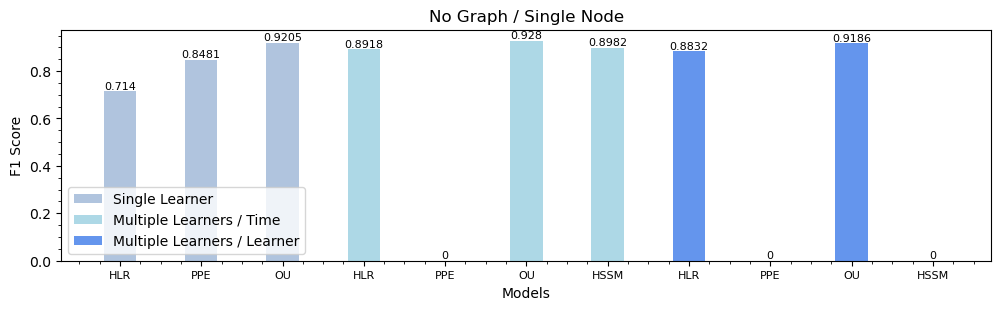

In [6]:
# final results comparison
fig, ax = plt.subplots(figsize=(12, 3))
ax.minorticks_on()


# Save the chart so we can loop through the bars below.
bars1 = ax.bar(
    x=np.arange(0,6,2),
    height=no_graph_single_user_single_node['f1'],
    tick_label=no_graph_single_user_single_node['model_name'],
    color='lightsteelblue',
    width=0.8
)
ax.bar_label(bars1, size=8)


bars2= ax.bar(
    x=np.arange(6, 14, 2),
    height=no_graph_multi_user_single_node_split_time['f1'],
    tick_label=no_graph_multi_user_single_node_split_time['model_name'],
    color='lightblue',
    width=0.8
)
ax.bar_label(bars2, size=8)


bars3= ax.bar(
    x=np.arange(14, 22, 2),
    height=no_graph_multi_user_single_node_split_learner['f1'],
    label=no_graph_multi_user_single_node_split_learner['model_name'],
    color='cornflowerblue',
    width=0.8
)
ax.bar_label(bars3, size=8)



ax.legend((bars1[0], bars2[0], bars3[0]), 
          ('Single Learner', 'Multiple Learners / Time', 'Multiple Learners / Learner'),
         loc = 'lower left')
name = no_graph_single_user_single_node['model_name'] + \
                no_graph_multi_user_single_node_split_time['model_name'] + \
                no_graph_multi_user_single_node_split_learner['model_name']

ax.set_xticks(np.arange(0,22,2), name, size=8)
# ax.set_xticks(name)
# ax.set_xticklabels(name, minor=True)
# plt.setp(ax.get_xticklabels(), rotation=0)

# giving title to the plot
plt.title("No Graph / Single Node")

# giving X and Y labels
plt.xlabel("Models")
plt.ylabel("F1 Score")


Text(0, 0.5, 'F1 Score')

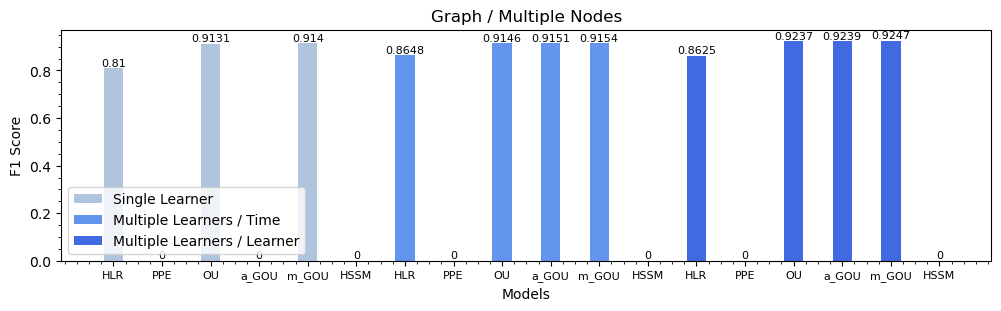

In [7]:
# final results comparison
fig, ax = plt.subplots(figsize=(12, 3))
ax.minorticks_on()


# Save the chart so we can loop through the bars below.
bars1 = ax.bar(
    x=np.arange(0,12,2),
    height=graph_single_user_single_node['f1'],
    tick_label=graph_single_user_single_node['model_name'],
    color='lightsteelblue',
    width=0.8
)
ax.bar_label(bars1, size=8)


bars2= ax.bar(
    x=np.arange(12, 24, 2),
    height=graph_multi_user_single_node_split_time['f1'],
    tick_label=graph_multi_user_single_node_split_time['model_name'],
    color='cornflowerblue',
    width=0.8
)
ax.bar_label(bars2, size=8)


bars3= ax.bar(
    x=np.arange(24, 36, 2),
    height=graph_multi_user_single_node_split_learner['f1'],
    label=graph_multi_user_single_node_split_learner['model_name'],
    color='royalblue',
    width=0.8
)
ax.bar_label(bars3, size=8)



ax.legend((bars1[0], bars2[0], bars3[0]), 
          ('Single Learner', 'Multiple Learners / Time', 'Multiple Learners / Learner'),
         loc = 'lower left')
name = graph_single_user_single_node['model_name'] + \
                graph_multi_user_single_node_split_time['model_name'] + \
                graph_multi_user_single_node_split_learner['model_name']

ax.set_xticks(np.arange(0,36,2), name, size=8)
# ax.set_xticks(name)
# ax.set_xticklabels(name, minor=True)
# plt.setp(ax.get_xticklabels(), rotation=0)

# giving title to the plot
plt.title("Graph / Multiple Nodes")
     
# giving X and Y labels
plt.xlabel("Models")
plt.ylabel("F1 Score")


Text(0, 0.5, 'Accuracy')

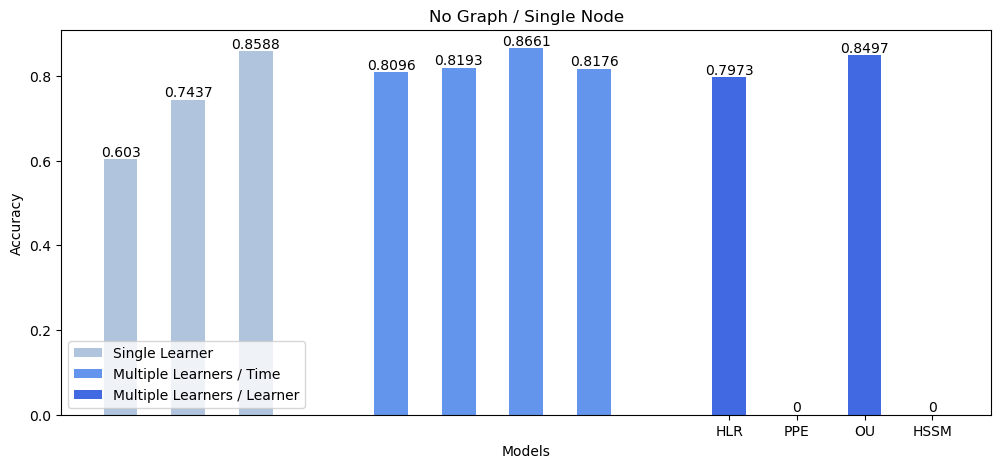

In [12]:
# final results comparison
fig, ax = plt.subplots(figsize=(12, 5))
# fig = plt.figure()

bars1 = ax.bar(
    x=np.arange(3),
    height=no_graph_single_user_single_node['accuracy'],
    tick_label=no_graph_single_user_single_node['model_name'],
    color='lightsteelblue',
    width=0.5
)


bars2= ax.bar(
    x=np.arange(4, 8),
    height=no_graph_multi_user_single_node_split_time['accuracy'],
    tick_label=no_graph_multi_user_single_node_split_time['model_name'],
    color='cornflowerblue',
    width=0.5
)


bars3= ax.bar(
    x=np.arange(9, 13),
    height=no_graph_multi_user_single_node_split_learner['accuracy'],
    tick_label=no_graph_multi_user_single_node_split_learner['model_name'],
    color='royalblue',
    width=0.5
)

ax.bar_label(bars1)
ax.bar_label(bars2)
ax.bar_label(bars3)


ax.legend((bars1[0], bars2[0], bars3[0]), 
          ('Single Learner', 'Multiple Learners / Time', 'Multiple Learners / Learner'),
         loc = 'lower left')
# giving title to the plot
plt.title("No Graph / Single Node")
     
# giving X and Y labels
plt.xlabel("Models")
plt.ylabel("Accuracy")


Text(0, 0.5, 'Scores')

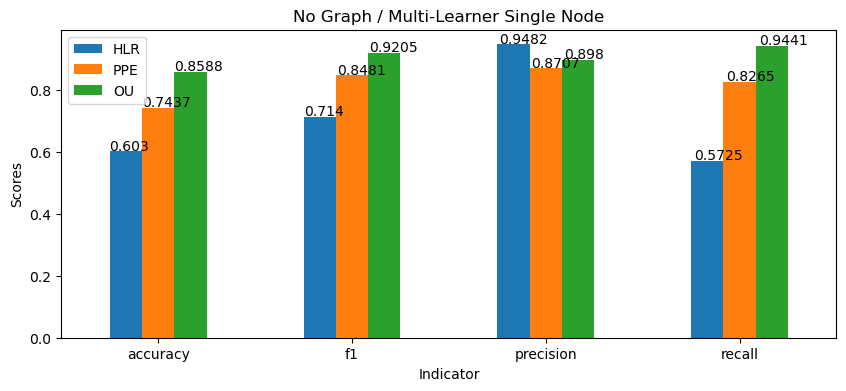

In [8]:
####### exp1
no_graph_single_user_single_node = { # HLR PPE VanillaOU 
    'model_name': ['HLR', 'PPE', 'OU'],
    'accuracy': [0.6030, 0.7437, 0.8588],
    'f1': [0.7140, 0.8481, 0.9205],
    'precision': [0.9482, 0.8707, 0.8980],
    'recall': [0.5725, 0.8265, 0.9441],
}
exp1 = pd.DataFrame(
    np.array([[0.6030, 0.7437, 0.8588], [0.7140, 0.8481, 0.9205],[0.9482, 0.8707, 0.8980],[0.5725, 0.8265, 0.9441]]
    ),
    columns=no_graph_single_user_single_node['model_name'], 
    index=['accuracy', 'f1', 'precision', 'recall']
)

# final results comparison
# fig, ax = plt.subplots(figsize=(12, 3))
ax.minorticks_on()
ax = exp1.plot(kind='bar', figsize=(10,4), rot = 0)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005), size=10)
ax.set_title("No Graph / Multi-Learner Single Node")

# giving X and Y labels
ax.set_xlabel("Indicator")
ax.set_ylabel("Scores")

Text(0, 0.5, 'Scores')

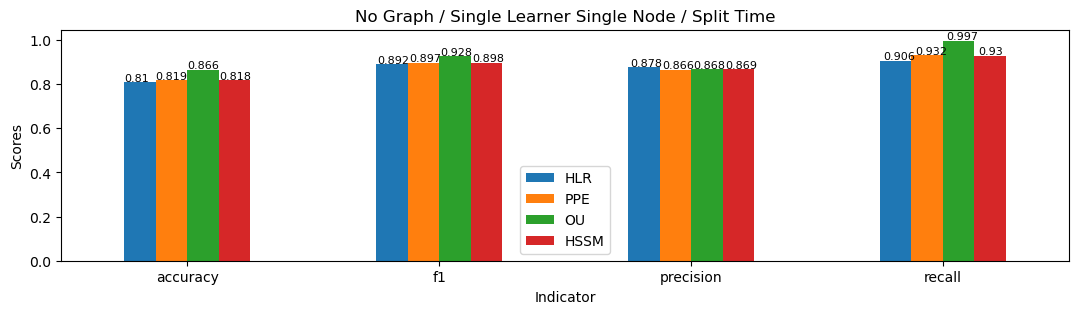

In [9]:
########## exp2
no_graph_multi_user_single_node_split_time = { # HLR PPE VanillaOU ArmotizedSSM 
    'model_name': ['HLR', 'PPE', 'OU', 'HSSM'],
    'accuracy': [0.8096, 0.8193, 0.8661, 0.8176],
    'f1': [0.8918, 0.8973, 0.9280, 0.8982],
    'precision': [0.8776, 0.8655, 0.8679, 0.8688],
    'recall': [0.9064, 0.9315, 0.9972, 0.9296],
}
exp2 = pd.DataFrame(
    np.array([[0.8096, 0.8193, 0.8661, 0.8176], 
              [0.8918, 0.8973, 0.9280, 0.8982], 
              [0.8776, 0.8655, 0.8679, 0.8688],
              [0.9064, 0.9315, 0.9972, 0.9296]]
    ),
    columns=no_graph_multi_user_single_node_split_time['model_name'], 
    index=['accuracy', 'f1', 'precision', 'recall']
)

# final results comparison
# fig, ax = plt.subplots(figsize=(12, 3))
ax.minorticks_on()
ax = exp2.plot(kind='bar', figsize=(13,3), rot = 0)

for p in ax.patches:
    ax.annotate(str(p.get_height().round(3)), (p.get_x() * 1.005, p.get_height() * 1.005), size=8)
ax.set_title("No Graph / Single Learner Single Node / Split Time")

# giving X and Y labels
ax.set_xlabel("Indicator")
ax.set_ylabel("Scores")

Text(0, 0.5, 'Scores')

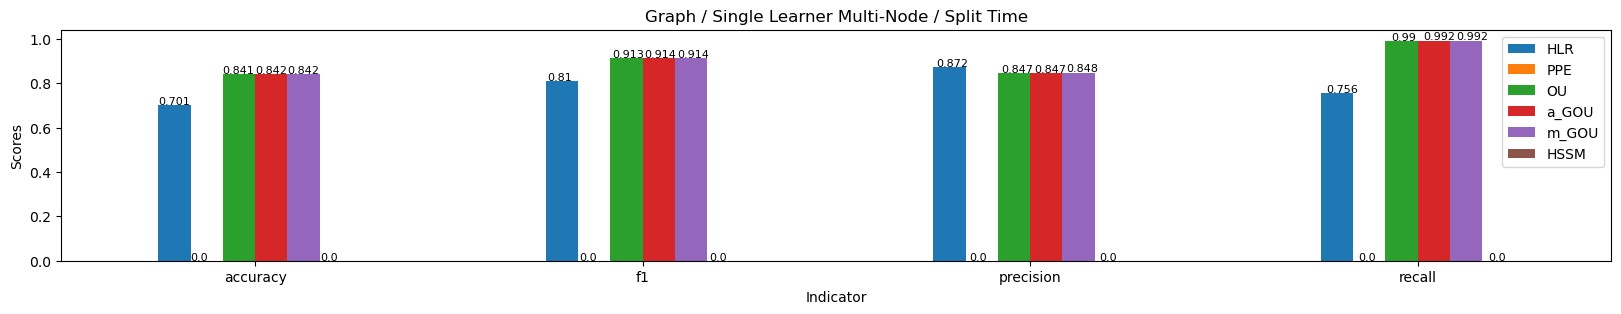

In [10]:
########## exp4
graph_single_user_single_node = {
    'model_name': ['HLR', 'PPE', 'OU', 'a_GOU', 'm_GOU', 'HSSM'],
    'accuracy': [0.7014, 0.0, 0.8413, 0.0, 0.8416, 0.0], 
    'f1': [0.8100, 0.0, 0.9131, 0.0, 0.9140, 0.0], 
    'precision': [0.8720, 0.0, 0.8469, 0.0, 0.8475, 0.0], 
    'recall': [0.7562, 0.0, 0.9904, 0.0, 0.9918, 0.0], 
}
exp4 = pd.DataFrame(
    np.array([[0.7014, 0.0, 0.8413, 0.8416, 0.8419, 0.0], 
              [0.8100, 0.0, 0.9131, 0.9135, 0.9140, 0.0], 
              [0.8720, 0.0, 0.8469, 0.8467, 0.8475, 0.0], 
              [0.7562, 0.0, 0.9904, 0.9916, 0.9918, 0.0], ]
    ),
    columns=graph_single_user_single_node['model_name'], 
    index=['accuracy', 'f1', 'precision', 'recall']
)

ax = exp4.plot(kind='bar', figsize=(20,3), rot = 0)

i = 0
for p in ax.patches:
    ax.annotate(str(p.get_height().round(3)), (p.get_x() * 1.005, (p.get_height())*1.005), size=8)
    i = i+1
ax.set_title("Graph / Single Learner Multi-Node / Split Time")

ax.set_xlabel("Indicator")
ax.set_ylabel("Scores")

Text(0, 0.5, 'Scores')

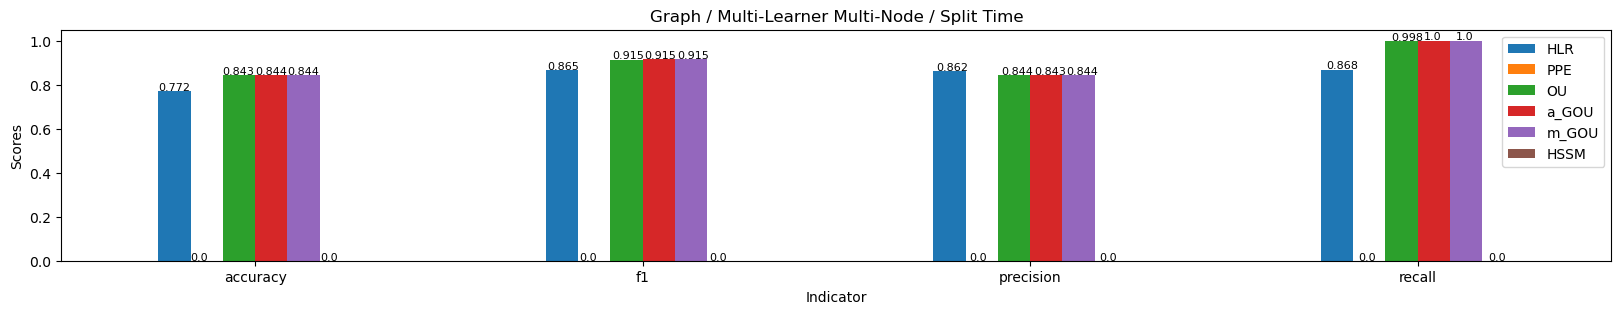

In [11]:
########## exp5
graph_multi_user_single_node_split_time = {
    'model_name': ['HLR', 'PPE', 'OU', 'a_GOU', 'm_GOU', 'HSSM'],
    'accuracy': [0.7716, 0.0, 0.8430, 0.8437, 0.8437, 0.0], 
    'f1': [0.8648, 0.0, 0.9146, 0.9151, 0.9154, 0.0], 
    'precision': [0.8619, 0.0, 0.8437, 0.8434, 0.8439, 0.0], 
    'recall': [0.8678, 0.0, 0.9985, 1.00, 1.00, 0.0],
}
exp5 = pd.DataFrame(
    np.array([[0.7716, 0.0, 0.8430, 0.8437, 0.8437, 0.0], 
              [0.8648, 0.0, 0.9146, 0.9151, 0.9154, 0.0], 
              [0.8619, 0.0, 0.8437, 0.8434, 0.8439, 0.0], 
              [0.8678, 0.0, 0.9985, 1.00, 1.00, 0.0], ]
    ),
    columns=graph_multi_user_single_node_split_time['model_name'], 
    index=['accuracy', 'f1', 'precision', 'recall']
)
ax = exp5.plot(kind='bar', figsize=(20,3), rot = 0)

i = 0
for p in ax.patches:
    ax.annotate(str(p.get_height().round(3)), (p.get_x() * 1.005, (p.get_height())*1.005), size=8)
    i = i+1
ax.set_title("Graph / Multi-Learner Multi-Node / Split Time")

# giving X and Y labels
ax.set_xlabel("Indicator")
ax.set_ylabel("Scores")